# Sample Philips Analysis

In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path

print(Path().cwd())

c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS\CLI-Demos


In [2]:
os.chdir(Path().cwd().parent)

In [3]:
print(Path().cwd())

c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS


# Select Image & Phantom and Parse

In [4]:
from pyquantus.parse.philipsRf import philipsRfParser
from pyquantus.parse.philipsMat import philips2dRfMatParser

ImportError: cannot import name 'philipsRfParser' from 'pyquantus.parse.philipsRf' (c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS\pyquantus\parse\philipsRf.py)

In [5]:
# imagePath = '/Volumes/CREST Data/David_S_Data/Philips SC 2D/V06_20180626_133351.rf'
# phantomPath = '/Volumes/CREST Data/David_S_Data/Philips SC 2D/C3P11SED00_20180821_102323.rf'

imagePath = r'd:\Omid\0_samples\Philips\UKDFIBEPIC003\UKDFIBEPIC003INTER3D_20250424_094008.rf'
phantomPath = r'd:\Omid\0_samples\Philips\UKDFIBEPIC003\UKDFIBEPIC003INTER3D_20250424_094008.rf'

In [6]:
dataFile = open(imagePath, 'rb')
dataSig = list(dataFile.read(8))
phantomFile = open(phantomPath, 'rb')
phantomSig = list(phantomFile.read(8))

In [7]:
# Assert inputted data has Philips signature
assert dataSig == [0,0,0,0,255,255,0,0]
assert phantomSig == [0,0,0,0,255,255,0,0]

In [8]:
destImgFilePath = imagePath.replace('.rf', '.mat')
destPhantomFilePath = phantomPath.replace('.rf', '.mat')

In [9]:
imgShape = philipsRfParser(imagePath)
# phantomShape = philipsRfParser(phantomPath)

2025-05-12 16:08:50,392 - INFO - Starting philipsRfParser for file: d:\Omid\0_samples\Philips\UKDFIBEPIC003\UKDFIBEPIC003INTER3D_20250424_094008.rf
2025-05-12 16:08:50,393 - INFO - Opening RF file: d:\Omid\0_samples\Philips\UKDFIBEPIC003\UKDFIBEPIC003INTER3D_20250424_094008.rf
2025-05-12 16:08:50,393 - INFO - Header information found.
2025-05-12 16:08:50,394 - INFO - Parsing Fusion RF capture file...
2025-05-12 16:08:50,394 - INFO - Starting parseFileHeader.
2025-05-12 16:08:50,396 - INFO - File Version: 6
2025-05-12 16:08:50,396 - INFO - Header Size: 880 bytes
2025-05-12 16:08:50,397 - INFO - Finished parsing file header.


IndexError: index 34471937 is out of bounds for axis 0 with size 34471937

In [ ]:
imgDataStruct, imgInfoStruct, refDataStruct, refInfoStruct = philips2dRfMatParser(destImgFilePath, destPhantomFilePath, frame=0)

/Users/davidspector/Home/Stanford/QuantUS Projects/PyQuantUS/.venv/lib/python3.11/site-packages/pyquantus/parse/philipsMat.py:82: RuntimeWarning: divide by zero encountered in log10
  bmode[:,i] = 20*np.log10(abs(hilbert(echoData[:,i]))) # type: ignore
/Users/davidspector/Home/Stanford/QuantUS Projects/PyQuantUS/.venv/lib/python3.11/site-packages/pyquantus/parse/philipsMat.py:82: RuntimeWarning: invalid value encountered in cast
  bmode[:,i] = 20*np.log10(abs(hilbert(echoData[:,i]))) # type: ignore


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

numpy_folder = r'D:\Omid\0_samples\Philips\David\sample_npy'

# Load the .npy files
echo_data = np.load(os.path.join(numpy_folder, 'echoData.npy'))
line_data = np.load(os.path.join(numpy_folder, 'lineData.npy'))
line_header = np.load(os.path.join(numpy_folder, 'lineHeader.npy'))
rf_data_all_fund = np.load(os.path.join(numpy_folder, 'rf_data_all_fund.npy'))
rf_data_all_harm = np.load(os.path.join(numpy_folder, 'rf_data_all_harm.npy'))

# Print shapes for verification
print("Data Shapes:")
print("-" * 50)
print(f"echoData shape: {echo_data.shape}")
print(f"lineData shape: {line_data.shape}")
print(f"lineHeader shape: {line_header.shape}")
print(f"rf_data_all_fund shape: {rf_data_all_fund.shape}")
print(f"rf_data_all_harm shape: {rf_data_all_harm.shape}")


Data Shapes:
--------------------------------------------------
echoData shape: (8487, 1, 2342)
lineData shape: (137892, 1170)
lineHeader shape: (137892, 2342)
rf_data_all_fund shape: (12, 1, 4250, 192)
rf_data_all_harm shape: (12, 1, 4250, 192)


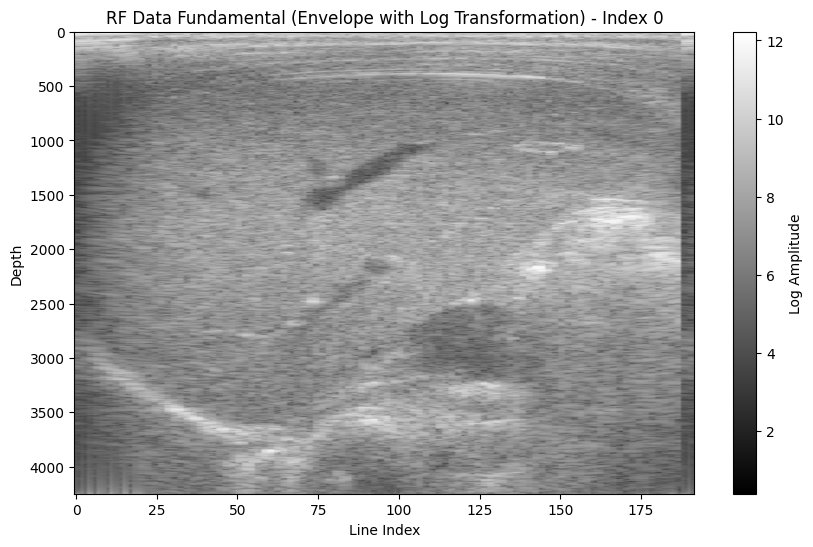

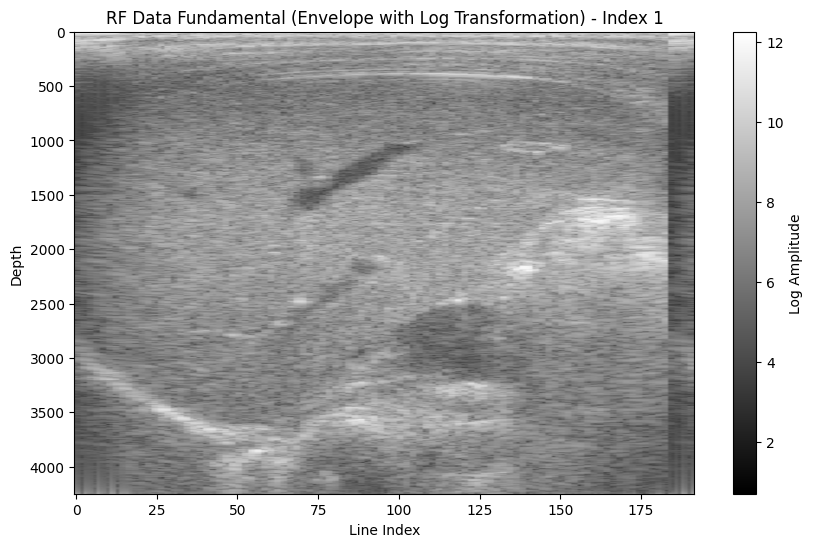

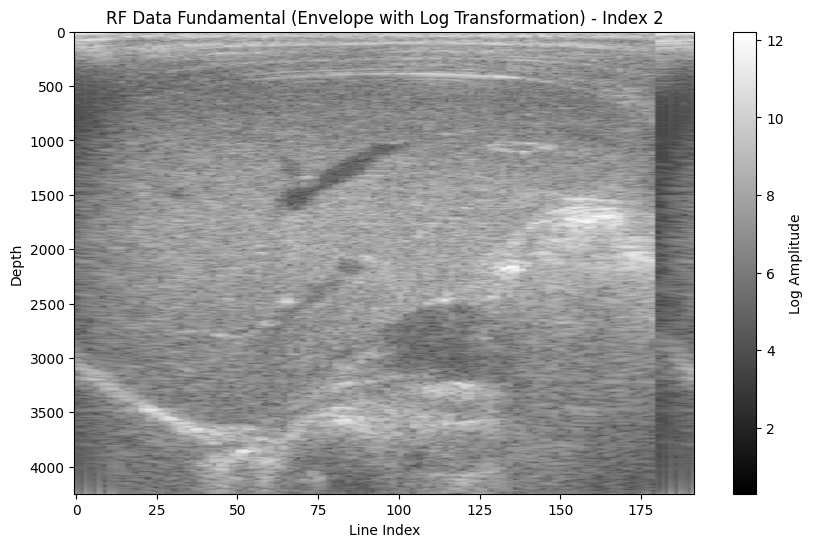

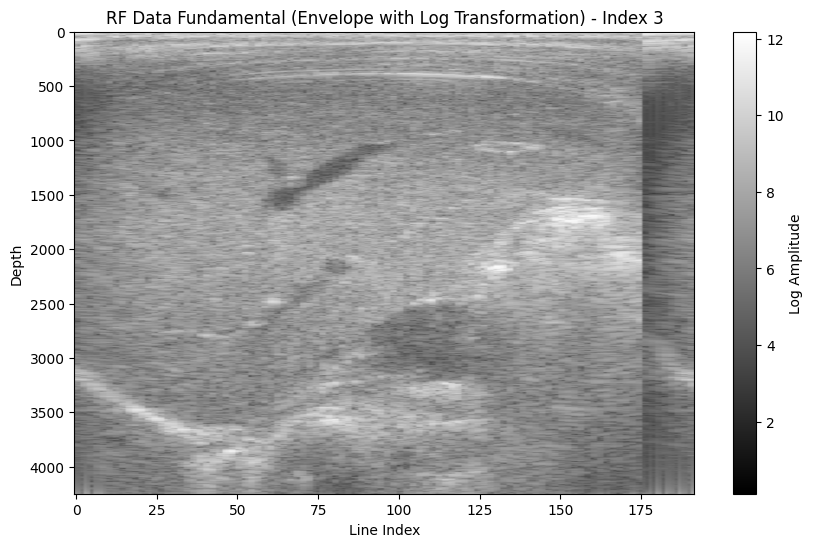

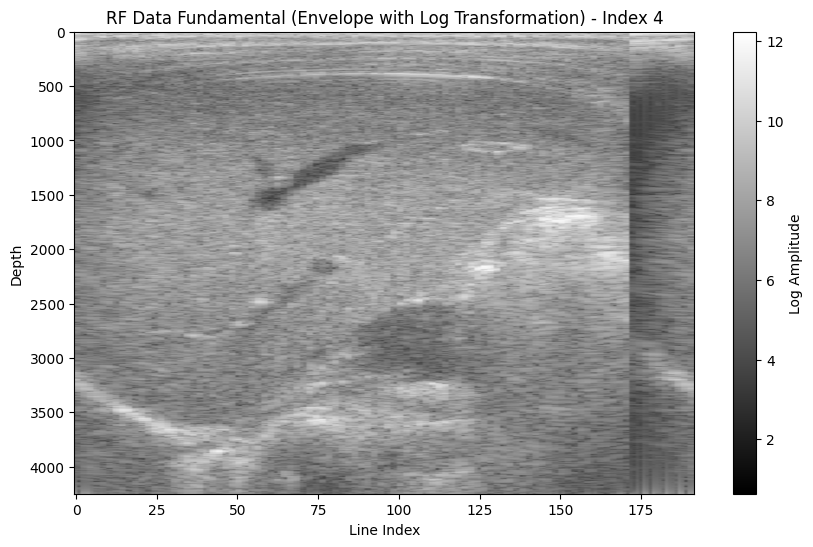

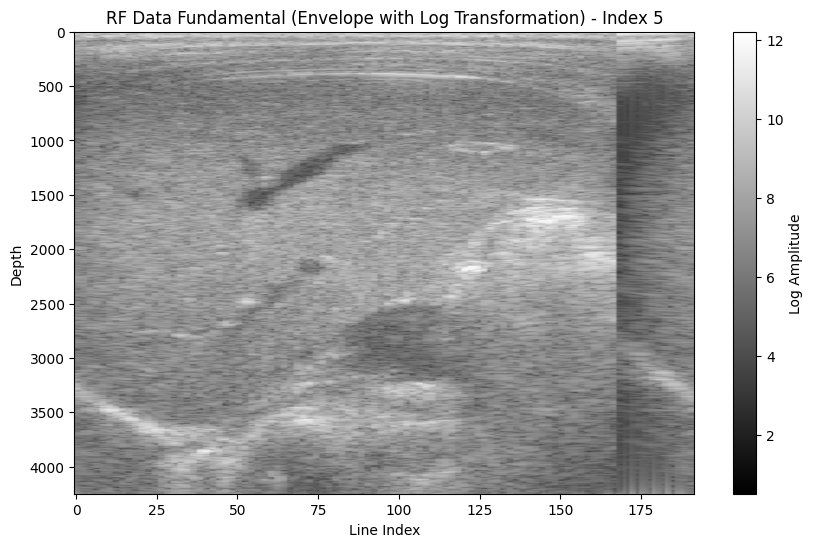

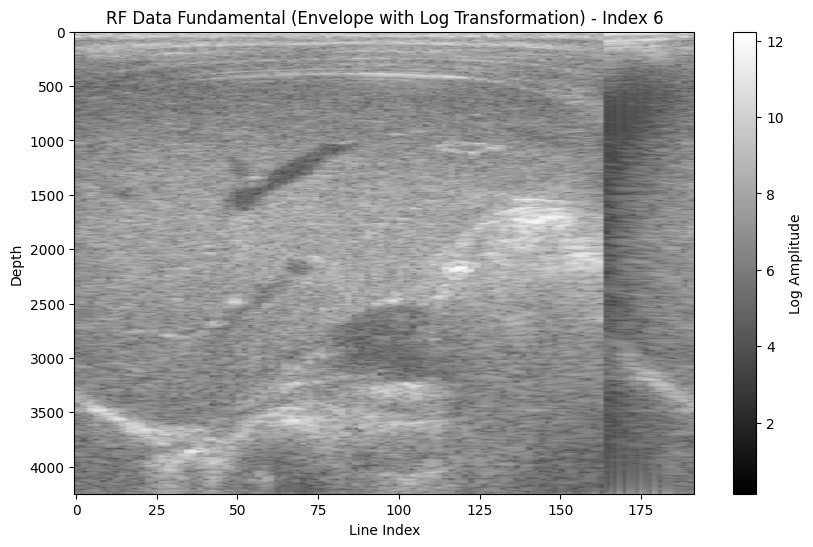

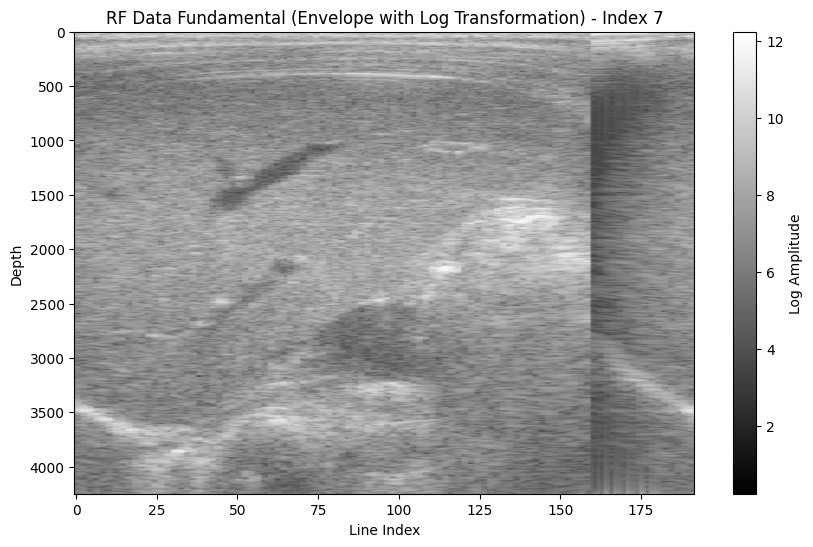

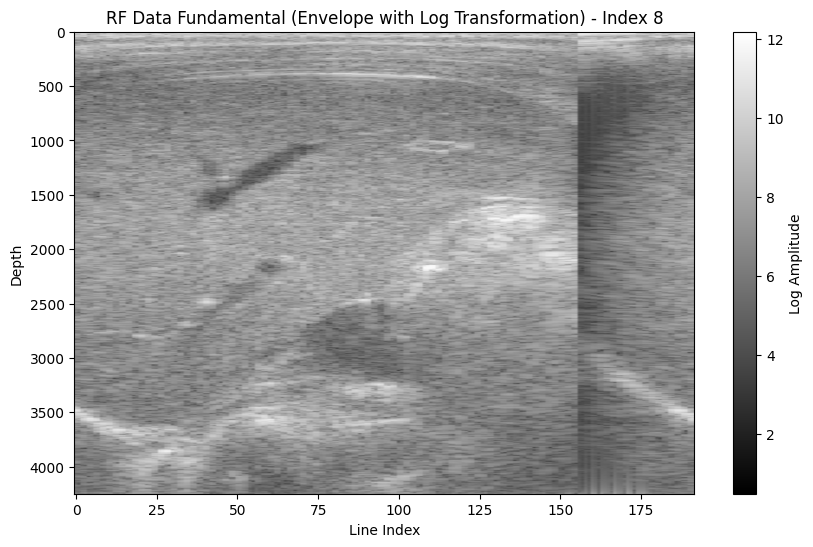

In [ ]:
# plot rf_data_all_fund and rf_data_all_harm as 2d b mode images with envelope detection and log transformation
# rf_data_all_fund and rf_data_all_harm have shape (4238, 192) for the last two dimensions

from scipy.signal import hilbert

# Function to plot data with envelope detection and log transformation
def plot_rf_data(data, title_prefix):
    for i in range(data.shape[0]):
        # Reshape the data to use just the last two dimensions
        rf_2d = data[i, 0, :, :]

        # Get envelope using Hilbert transform
        analytic_signal = np.abs(hilbert(rf_2d, axis=0))

        # Apply log transformation
        log_analytic_signal = np.log1p(analytic_signal)  # log1p is used to avoid log(0) issues

        plt.figure(figsize=(10, 6))
        plt.imshow(log_analytic_signal, aspect='auto', cmap='gray')
        plt.title(f'{title_prefix} (Envelope with Log Transformation) - Index {i}')
        plt.xlabel('Line Index')
        plt.ylabel('Depth')
        plt.colorbar(label='Log Amplitude')
        plt.show()

# Plot rf_data_all_fund
#plot_rf_data(rf_data_all_fund, 'RF Data Fundamental')

# Plot rf_data_all_harm
#plot_rf_data(rf_data_all_harm, 'RF Data Harmonic')

In [3]:
# Plot a B-mode image of a portion of lineData using envelope detection and log transformation

# Define the portion of lineData to visualize
start_index = 0
end_index = 1000  # Adjust this range to control the portion of data visualized

# Extract the portion of lineData
line_data_portion = line_data[start_index:end_index, :]

# Get envelope using Hilbert transform
analytic_signal = np.abs(hilbert(line_data_portion, axis=0))

# Apply log transformation
log_analytic_signal = np.log1p(analytic_signal)  # log1p is used to avoid log(0) issues

# Plot the B-mode image
plt.figure(figsize=(10, 6))
plt.imshow(log_analytic_signal, aspect='auto', cmap='gray')
plt.title('B-mode Image of lineData (Envelope with Log Transformation)')
plt.xlabel('Line Index')
plt.ylabel('Depth')
plt.colorbar(label='Log Amplitude')
plt.show()


NameError: name 'hilbert' is not defined

# ROI Selection (from GUI)

In [ ]:
import pickle

pkl_name = "/Volumes/CREST Data/David_S_Data/Philips SC 2D/roi.pkl"

with open(pkl_name, "rb") as f:
    roi_info = pickle.load(f)

/var/folders/5z/myjw1nc12n3g808z31wz0kt80000gn/T/ipykernel_82539/50617539.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  roi_info = pickle.load(f)


In [ ]:
from pathlib import Path

assert roi_info["Image Name"] == Path(destImgFilePath).name
assert roi_info["Phantom Name"] == Path(destPhantomFilePath).name

In [ ]:
scSplineX = roi_info["Spline X"]
scSplineY = roi_info["Spline Y"]

# Analysis Config (from GUI)

In [ ]:
from pyquantus.utc import AnalysisConfig

config = AnalysisConfig()

config.transducerFreqBand = [2000000, 8000000] # [min, max] (Hz)
config.analysisFreqBand = [3000000, 7000000] # [lower, upper] (Hz)
config.samplingFrequency = 20000000 # Hz
config.axWinSize = 0.71 # axial length per window (mm)
config.latWinSize = 0.71 # lateral length per window (mm)
config.windowThresh = 0.95 # % of window area required to be considered in ROI
config.axialOverlap = 0.5 # % of window overlap in axial direction
config.lateralOverlap = 0.5 # % of window overlap in lateral direction
config.centerFrequency = 9000000 # Hz

# UTC Analysis

In [ ]:
from pyquantus.utc import UltrasoundImage

ultrasoundImage = UltrasoundImage()
ultrasoundImage.axialResRf = imgInfoStruct.depth / imgDataStruct.rf.shape[0]
ultrasoundImage.lateralResRf = ultrasoundImage.axialResRf * (
    imgDataStruct.rf.shape[0]/imgDataStruct.rf.shape[1]
) # placeholder
ultrasoundImage.bmode = imgDataStruct.bMode
ultrasoundImage.phantomRf = refDataStruct.rf
ultrasoundImage.rf = imgDataStruct.rf
ultrasoundImage.scBmode = imgDataStruct.scBmode
ultrasoundImage.xmap = imgDataStruct.scBmodeStruct.xmap
ultrasoundImage.ymap = imgDataStruct.scBmodeStruct.ymap

In [ ]:
from pyquantus.utc import UtcAnalysis

utcAnalysis = UtcAnalysis()
utcAnalysis.ultrasoundImage = ultrasoundImage
utcAnalysis.config = config
utcAnalysis.initAnalysisConfig()
utcAnalysis.scSplineX = scSplineX
utcAnalysis.scSplineY = scSplineY

In [ ]:
utcAnalysis.refAttenuation = 0.5 # placeholder for attenuation coefficient at center freq (db/cm/MHz)
utcAnalysis.refBackScatterCoef = 10e-3 # placeholder for backscatter coefficient at center freq (cm^-1 sr^-1)

In [ ]:
utcAnalysis.splineToPreSc()
utcAnalysis.generateRoiWindows()
utcAnalysis.computeUtcWindows()

/Users/davidspector/Home/Stanford/QuantUS Projects/PyQuantUS/.venv/lib/python3.11/site-packages/pyquantus/qus/analysis.py:192: RuntimeWarning: divide by zero encountered in divide
  w = np.nanmean((r / p) ** 2, axis=1)
/Users/davidspector/Home/Stanford/QuantUS Projects/PyQuantUS/.venv/lib/python3.11/site-packages/pyquantus/qus/analysis.py:193: RuntimeWarning: divide by zero encountered in divide
  u = (w**2) / np.var((r / p) ** 2, axis=1)
/Users/davidspector/Home/Stanford/QuantUS Projects/PyQuantUS/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [ ]:
import numpy as np

mbfArr = [window.results.mbf for window in utcAnalysis.roiWindows]
ssArr = [window.results.ss for window in utcAnalysis.roiWindows]
siArr = [window.results.si for window in utcAnalysis.roiWindows]
attArr = [window.results.attCoef for window in utcAnalysis.roiWindows]
bscArr = [window.results.bsc for window in utcAnalysis.roiWindows]
uNakagamiArr = [window.results.uNakagami for window in utcAnalysis.roiWindows]

print("Average Midband Fit:", np.mean(mbfArr), "dB")
print("Average Spectral Slope:", np.mean(ssArr), "dB/MHz")
print("Average Spectral Intercept:", np.mean(siArr), "dB")
print("Average Attenuation Coefficient:", np.mean(attArr), "dB/cm/MHz")
print("Average Backscatter Coefficient:", np.mean(bscArr), "1/cm-sr")
print("Average Nakagami Parameter:", np.mean(uNakagamiArr))
print("w Nakagami Parameter:", utcAnalysis.nakagamiParams[0])
print("u Nakagami Parameter:", utcAnalysis.nakagamiParams[1])
# print("Effective Scatterer Diameter:", utcAnalysis.effectiveScattererDiameter, "µm") 
# print("Effective Scatterer Concentration:", utcAnalysis.effectiveScattererConcentration, "dB/mm^3")

# Visualizations

In [ ]:
from pyquantus.utc import UtcData
from pyquantus.parse.objects import ScConfig

scConfig = ScConfig()
scConfig.width = imgInfoStruct.width1
scConfig.tilt = imgInfoStruct.tilt1
scConfig.startDepth = imgInfoStruct.startDepth1
scConfig.endDepth = imgInfoStruct.endDepth1

utcData = UtcData()
utcData.utcAnalysis = utcAnalysis
utcData.scConfig = scConfig

In [ ]:
utcData.convertImagesToRGB()

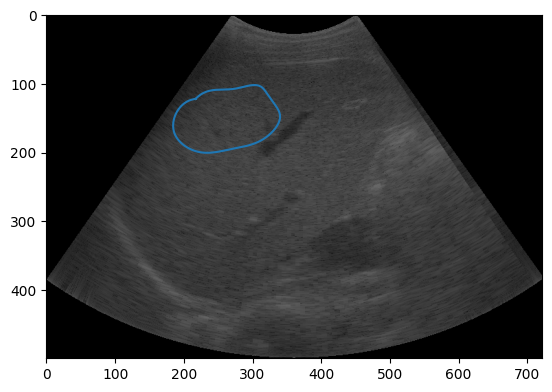

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(ultrasoundImage.scBmode)
plt.plot(scSplineX, scSplineY)

In [ ]:
utcData.drawCmaps()
utcData.scanConvertCmaps()

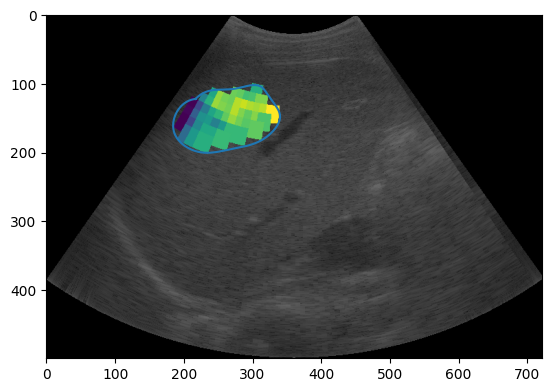

In [ ]:
plt.imshow(utcData.scMbfIm)
plt.plot(scSplineX, scSplineY)

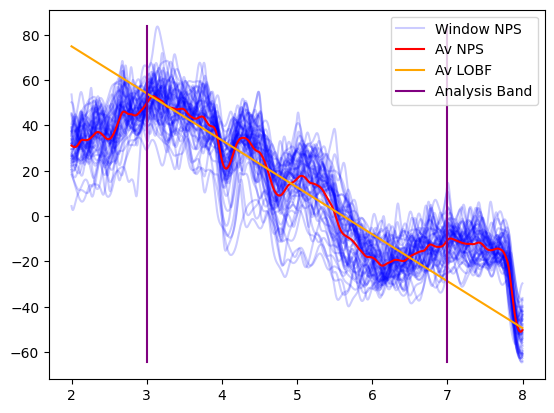

In [ ]:
utcData.plotPsData()